# Case 1 - Input = 1, Output = Multiple

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model #Functional API
from keras.models import Sequential #Sequential API
from keras.layers import *


In [ ]:
#Objective is below - Functional API
#model = Model(inputs = x, outputs = [output1, output2, output3])

In [2]:
x = Input(shape = (3,))
x.shape

(None, 3)

In [3]:
hidden1 = Dense(28, activation = 'relu')(x)
hidden2 = Dense(28, activation = 'relu')(hidden1)
output1 = Dense(1, activation = 'linear')(hidden2)
output2 = Dense(1, activation = 'sigmoid')(hidden2)
output3 = Dense(10, activation = 'softmax')(hidden2)
model = Model(inputs = x, outputs = [output1, output2, output3])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 28)             │            112 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 28)             │            812 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             29 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             29 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 10)             │            290 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,272 (4.97 KB)

 Trainable params: 1,272 (4.97 KB)

 Non-trainable params: 0 (0.00 B)

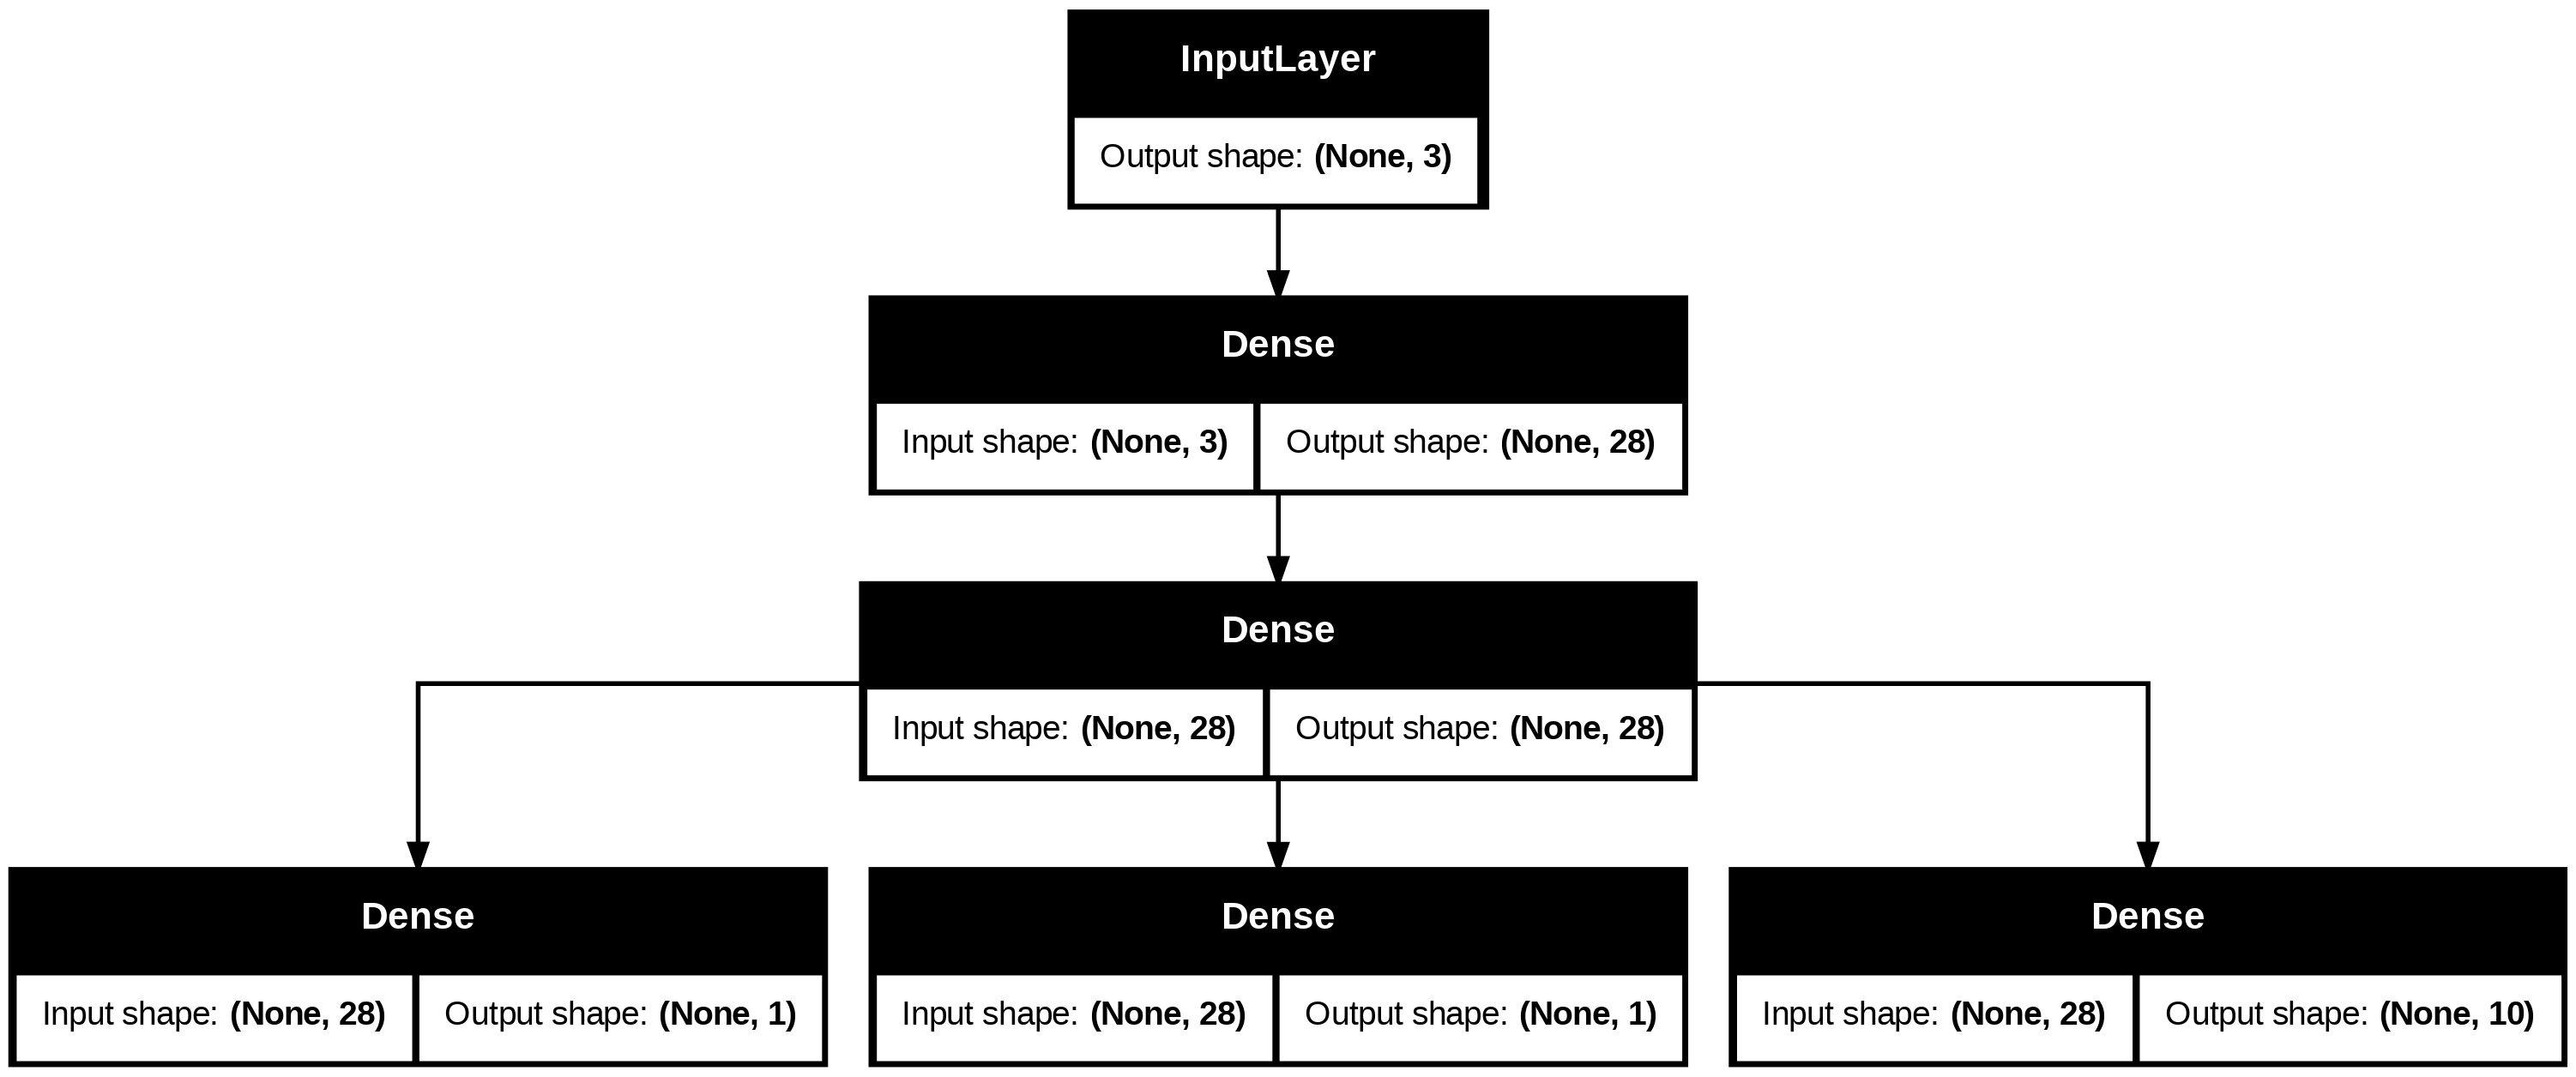

In [4]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

# Case 2 inputs = Many, outputs = 1
# input1 = Tabular Data
# input2 = Text Data
# input3 = Image Data
# Ask here to predict price basis the given 3 inputs

In [6]:
# Defining multiple inputs
input1 = Input(shape = (32,))
input2 = Input(shape = (128,))
input3 = Input(shape = (256,))

In [7]:
# input 1 connected with 2 hidden layer
hiddenx1 = Dense(8, activation = 'relu')(input1)
hiddenx2 = Dense(28, activation = 'relu')(hidden1)

#input 2 connected with 3 hidden layer
hiddeny1 = Dense(32, activation = 'relu')(input2)
hiddeny2 = Dense(16, activation = 'relu')(hiddeny1)
hiddeny3 = Dense(8, activation = 'relu')(hiddeny2)

#input 3 connected with 2 hidden layer
hiddenz1 = Dense(256, activation = 'relu')(input3)
hiddenz2 = Dense(128, activation = 'relu')(hiddenz1)

#combined
combined = concatenate([hiddenx2, hiddeny3, hiddenz2])

#after combining all three different input data, we have to connect with new hidden layer

mod = Dense(16, activation = 'relu')(combined)

#output

model = Model(inputs = [input1, input2, input3], outputs = mod)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 32)             │          4,128 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_3             │ (None, 256)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 28)             │            112 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 16)             │            528 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 256)            │         65,792 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 28)             │            812 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 8)              │            136 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 128)            │         32,896 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 164)            │              0 │ dense_7[0][0],         │
│                           │                        │                │ dense_10[0][0],        │
│                           │                        │                │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 32)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 16)             │          2,640 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 107,044 (418.14 KB)

 Trainable params: 107,044 (418.14 KB)

 Non-trainable params: 0 (0.00 B)

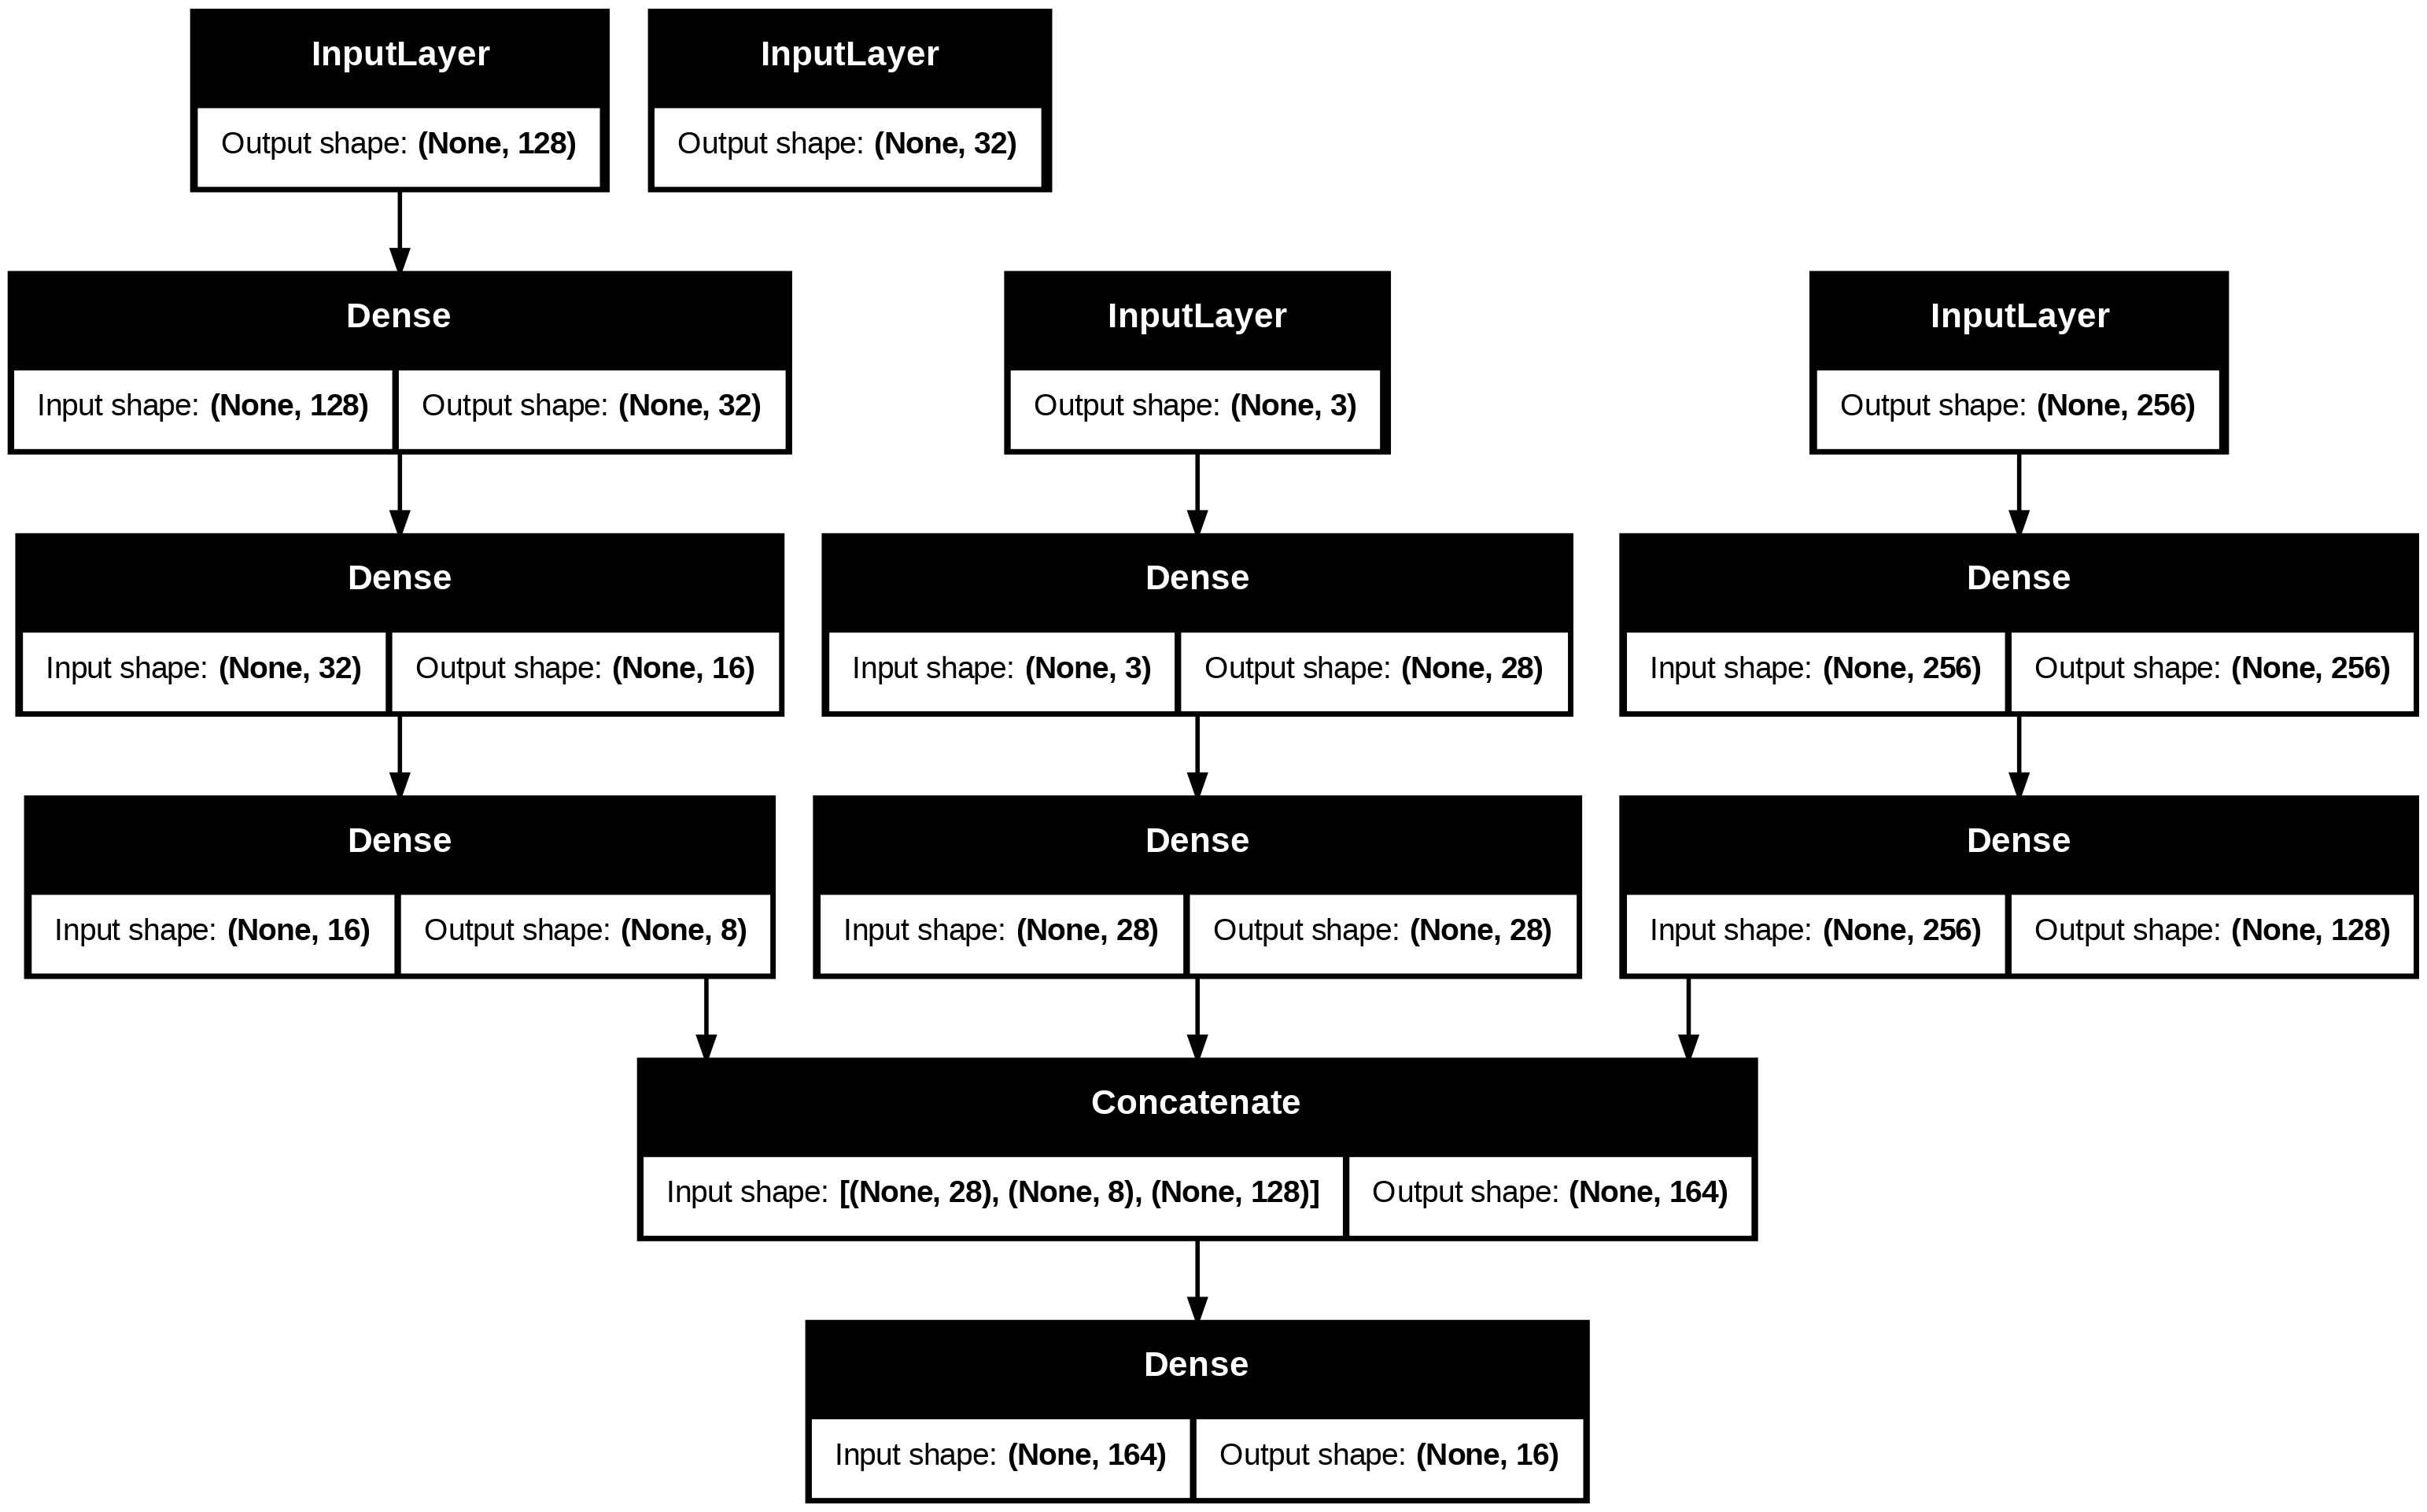

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes = True)

# Real Time Project - Kaggle Dataset
# https://www.kaggle.com/datasets/muhammadardiputra/utkface-dataset

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle/'


In [10]:
!kaggle datasets download -d muhammadardiputra/utkface-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammadardiputra/utkface-dataset
License(s): unknown
100% 330M/331M [00:19<00:00, 22.6MB/s]
100% 331M/331M [00:19<00:00, 17.5MB/s]


In [11]:
import zipfile
zip = zipfile.ZipFile('/content/utkface-dataset.zip')
zip.extractall('/content')
zip.close()

In [14]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [22]:
age = []
gender = []
emotion = []
img_path = []
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  emotion.append(int(file.split('_')[2][0]))
  img_path.append(file)


In [23]:
print(len(age))
print(len(gender))
print(len(emotion))
print(len(img_path))

23708
23708
23708
23708


In [25]:
df = pd.DataFrame({'age' : age, 'gender' : gender, 'emotion' : emotion, 'img' : img_path})
df.head()

,age,gender,emotion,img
0,1,0,2,1_0_2_20161219205827749.jpg.chip.jpg
1,29,0,2,29_0_2_20170116163545392.jpg.chip.jpg
2,4,1,4,4_1_4_20161221202534346.jpg.chip.jpg
3,31,0,0,31_0_0_20170117135307744.jpg.chip.jpg
4,1,0,2,1_0_2_20161219190025955.jpg.chip.jpg


In [26]:
train_df = df.sample(frac = 1, random_state = 0).iloc[:20000]
test_df = df.sample(frac = 1, random_state = 0).iloc[20000:]

In [27]:
print(train_df.shape, test_df.shape)

(20000, 4) (3708, 4)


In [28]:
#Making data into translation invariance (Data Augmentation)

In [29]:
train_datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.3,
                                   channel_shift_range=0.2, fill_mode='nearest',
                                   horizontal_flip=True, vertical_flip=True, rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_dataframe(train_df, directory = folder_path, x_col = 'img', y_col = ['age', 'gender', 'emotion'],
                                                    target_size = (200,200),
                                                    class_mode = 'multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df, directory = folder_path, x_col = 'img', y_col = ['age', 'gender', 'emotion'],
                                                  target_size = (200,200),
                                                  class_mode = 'multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


# Build Model

In [31]:
# Lenet-5, Alexnet - Old Models
# Best Models - VGG16, Resnet, Inception

In [33]:
# One of the best pre-trained model - VGG 16

In [42]:
from keras.applications.vgg16 import VGG16

In [40]:
from keras.layers import *

In [41]:
from keras.models import Model

In [43]:
vgg16_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (200,200,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [54]:
vgg16_model.trainable = False
output = vgg16_model.layers[-1].output
flatten = Flatten()(output)
#age
dense1 = Dense(512, activation = 'relu')(flatten)

#gender
dense2 = Dense(512, activation = 'relu')(flatten)

#emotion
dense3 = Dense(512, activation = 'relu')(flatten)

#dense 4 connect with age
dense4 = Dense(512, activation = 'relu')(dense1)

#dense 5 connect with gender
dense5 = Dense(512, activation = 'relu')(dense2)

#dense 6 connect with emotion
dense6 = Dense(512, activation = 'relu')(dense3)

#output
#regression
output1 = Dense(1, activation = 'linear', name = 'age')(dense4)

#binary_class
output2 = Dense(1, activation = 'sigmoid', name = 'gender')(dense5)

#multiclass classification
output3 = Dense(5, activation = 'softmax', name = 'emotion')(dense6)

#Functional API
model = Model(inputs = vgg16_model.input, outputs = [output1, output2, output3])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 200, 200, 64)   │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 200, 200, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 100, 100, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 100, 100, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 100, 100, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 50, 50, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 50, 50, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 50, 50, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 50, 50, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 25, 25, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 25, 25, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 25, 25, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 25, 25, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 12, 12, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 12, 12, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 12, 12, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 43,819,335 (167.16 MB)

 Trainable params: 29,104,647 (111.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [55]:
model.compile(optimizer = 'adam',
              loss = {'age' : 'mae', 'gender' : 'binary_crossentropy',
                      'emotion' : 'sparse_categorical_crossentropy'},
              metrics = {'age' : 'mae', 'gender' : 'accuracy',
                         'emotion' : 'accuracy'})

In [56]:
history = model.fit(train_generator, batch_size = 32, epochs = 10, validation_data = test_generator)

TypeError: `output_signature` must contain objects that are subclass of `tf.TypeSpec` but found <class 'list'> which is not.

In [50]:
sample = next(iter(train_generator))
print(sample)


(array([[[[7.73245931e-01, 5.88932216e-01, 5.18343985e-01],
         [7.67796814e-01, 5.83483100e-01, 5.12894869e-01],
         [7.62347639e-01, 5.78033924e-01, 5.07445633e-01],
         ...,
         [9.80683327e-01, 8.15977454e-01, 7.29702950e-01],
         [9.76208329e-01, 8.11502397e-01, 7.25227892e-01],
         [9.70946193e-01, 8.06240320e-01, 7.19965756e-01]],

        [[7.98569500e-01, 6.14255726e-01, 5.43667495e-01],
         [7.90940642e-01, 6.06626868e-01, 5.36038637e-01],
         [7.83311784e-01, 5.98998070e-01, 5.28409779e-01],
         ...,
         [9.79677558e-01, 8.14971685e-01, 7.28697181e-01],
         [9.74007487e-01, 8.09301555e-01, 7.23027050e-01],
         [9.72840190e-01, 8.08134317e-01, 7.21859813e-01]],

        [[8.22286904e-01, 6.37973189e-01, 5.67384958e-01],
         [8.15747917e-01, 6.31434143e-01, 5.60845912e-01],
         [8.09208930e-01, 6.24895215e-01, 5.54306984e-01],
         ...,
         [9.80496585e-01, 8.15790653e-01, 7.29516149e-01],
         

In [62]:
vgg16_model = VGG16(include_top=False, weights="imagenet",input_shape=(200,200,3) )
vgg16_model.trainable = False
output = vgg16_model.layers[-1].output
flatten = Flatten()(output)

# age
dense1 = Dense(512, activation='relu')(flatten)
# gender
dense2 = Dense(512, activation='relu')(flatten)
# emotion
dense3 = Dense(512, activation='relu')(flatten)

# dense4 connect with age
dense4 = Dense(512, activation='relu')(dense1)
# dense5 connect with gendre
dense5 = Dense(512, activation='relu')(dense2)

# dense6 connect with emotion
dense6 = Dense(512, activation='relu')(dense3)

# output
# 1) regression
output1 = Dense(1, activation='linear', name='age')(dense4)
# 2) binary class
output2 = Dense(1, activation='sigmoid', name='gender')(dense5)
# 3) multiclass classif.
output3 = Dense(5, activation='softmax', name='emotion')(dense6)

# Functional API
model = Model(inputs=vgg16_model.input, outputs=[output1, output2, output3])
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 200, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 200, 200, 64)   │          1,792 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 200, 200, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 100, 100, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 100, 100, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 100, 100, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 50, 50, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 50, 50, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 50, 50, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 50, 50, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 25, 25, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 25, 25, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 25, 25, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 25, 25, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 12, 12, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 12, 12, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 12, 12, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├──────────────────────

 Total params: 43,819,335 (167.16 MB)

 Trainable params: 29,104,647 (111.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [63]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender':'binary_crossentropy',
                                      'emotion':'sparse_categorical_crossentropy'},
              metrics = {'age':'mae', 'gender':'accuracy', 'emotion':'accuracy'})

In [64]:
history = model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

TypeError: `output_signature` must contain objects that are subclass of `tf.TypeSpec` but found <class 'list'> which is not.

In [60]:
# Making data into translation invariance (data augmentation)
train_datagen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.3,
                                   channel_shift_range = 0.2,
                                   fill_mode = "nearest",
                                   horizontal_flip = True,
                                   vertical_flip = True, rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
train_generator = train_datagen.flow_from_dataframe(train_df,directory = folder_path,
                                                    x_col='img', y_col=['age','gender','emotion'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

test_generator = test_datagen.flow_from_dataframe(test_df,directory = folder_path,
                                                    x_col='img', y_col=['age','gender','emotion'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp kaggle(1).json ~/.kaggle/'


In [2]:
!kaggle datasets download -d muhammadardiputra/utkface-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammadardiputra/utkface-dataset
License(s): unknown
 97% 322M/331M [00:03<00:00, 112MB/s]
100% 331M/331M [00:03<00:00, 103MB/s]


In [4]:
import zipfile
zip = zipfile.ZipFile('/content/utkface-dataset.zip')
zip.extractall('/content')

In [5]:
zip.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
folder_path = '/content/UTKFace'

In [11]:
import os
age = []
gender = []
emotion = []
img_path = []

for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  emotion.append(int(file.split('_')[2][0]))
  img_path.append(file)

In [12]:
len(age), len(gender), len(emotion), len(img_path)

(23708, 23708, 23708, 23708)

In [14]:
import pandas as pd
df = pd.DataFrame({'age':age, 'gender':gender,
                   "emotion":emotion,"img":img_path})

In [15]:
df.head()

,age,gender,emotion,img
0,36,1,1,36_1_1_20170116155035948.jpg.chip.jpg
1,25,0,0,25_0_0_20170116200929068.jpg.chip.jpg
2,56,1,0,56_1_0_20170104185820366.jpg.chip.jpg
3,29,1,4,29_1_4_20170103180829632.jpg.chip.jpg
4,28,0,1,28_0_1_20170117020752716.jpg.chip.jpg


In [16]:
train_df = df.sample(frac = 1, random_state = 0).iloc[:20000]
test_df = df.sample(frac = 1, random_state = 0).iloc[20000:]
print(train_df.shape, test_df.shape)

(20000, 4) (3708, 4)


In [17]:
train_generator = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.3,
                                   channel_shift_range = 0.2,
                                   fill_mode = "nearest",
                                   horizontal_flip = True,
                                   vertical_flip = True, rescale = 1./255)
test_generator = ImageDataGenerator(rescale = 1./255)

In [19]:
train_generated = train_generator.flow_from_dataframe(train_df, directory = folder_path,
                                                      x_col = 'img',
                                                      y_col = ['age', 'gender', 'emotion'],
                                                      target_size = (200,200),
                                                      class_mode = 'multi_output')

test_generated = test_generator.flow_from_dataframe(test_df,directory = folder_path,
                                                    x_col='img', y_col=['age','gender','emotion'],
                                                    target_size=(200,200),
                                                    class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [20]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

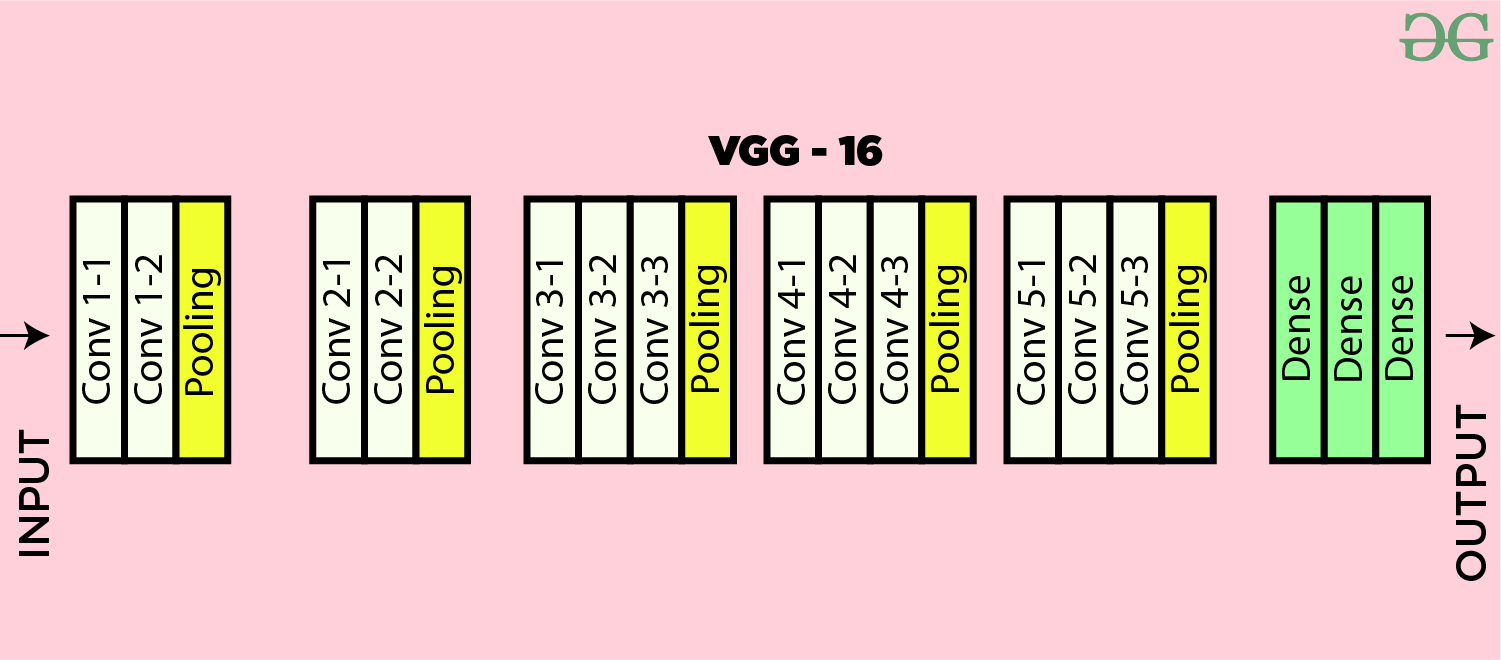

In [21]:
vgg16_model = VGG16(include_top=False, weights="imagenet",input_shape=(200,200,3) )
vgg16_model.trainable = False
output = vgg16_model.layers[-1].output
flatten = Flatten()(output)

# age
dense1 = Dense(512, activation='relu')(flatten)
# gender
dense2 = Dense(512, activation='relu')(flatten)
# emotion
dense3 = Dense(512, activation='relu')(flatten)

# dense4 connect with age
dense4 = Dense(512, activation='relu')(dense1)
# dense5 connect with gendre
dense5 = Dense(512, activation='relu')(dense2)

# dense6 connect with emotion
dense6 = Dense(512, activation='relu')(dense3)

# output
# 1) regression
output1 = Dense(1, activation='linear', name='age')(dense4)
# 2) binary class
output2 = Dense(1, activation='sigmoid', name='gender')(dense5)
# 3) multiclass classif.
output3 = Dense(5, activation='softmax', name='emotion')(dense6)

# Functional API
model = Model(inputs=vgg16_model.input, outputs=[output1, output2, output3])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 200, 200, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 200, 200, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 200, 200, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 100, 100, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 100, 100, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 100, 100, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 50, 50, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 50, 50, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 50, 50, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 50, 50, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 25, 25, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 25, 25, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 25, 25, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 25, 25, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 12, 12, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 12, 12, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 12, 12, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv3 (Conv2D)

 Total params: 43,819,335 (167.16 MB)

 Trainable params: 29,104,647 (111.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender':'binary_crossentropy',
                                      'emotion':'sparse_categorical_crossentropy'},
              metrics = {'age':'mae', 'gender':'accuracy', 'emotion':'accuracy'})

In [23]:
history = model.fit(train_generator, batch_size=32, epochs=10, validation_data=test_generator)

ValueError: Unrecognized data type: x=<keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x7f873fa59d50> (of type <class 'keras.src.legacy.preprocessing.image.ImageDataGenerator'>)